The dataset CellDNA.csv contains various measurements (e.g., size, center, texture) of thousands of bacteria observed under a microscope. The last column represents the target variable:

- Non-zero values indicate bacteria that are of interest for further study.

- Zero values indicate bacteria that are not considered interesting.

To simplify the task into a binary classification problem, the target column is converted into:

- 1 for interesting bacteria (non-zero values)

- 0 for non-interesting bacteria

Project Objectives
1. Design a neural network model to classify bacteria as either interesting (1) or not (0).

2. Evaluate the model’s performance and analyze its classification results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical,plot_model


In [2]:
# load file from local
from google.colab import files
uploaded = files.upload()

Saving CellDNA.csv to CellDNA.csv


### Data Processing and Model Training

#### Import Data and Data Pre-processing

In [3]:
df = pd.read_csv('CellDNA.csv', header=None)
df.head()

# Define X and y
X,raw_y = np.split(df,[-1],axis=1)

# Scale the features (excluding the last column)
X = preprocessing.scale(X)

# Separate the features and the target
y = np.where(raw_y == 0, 0, 1)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


#### Model Design

As its binary classification, the final layer has 2 outputs.

In [4]:
# Define the model
model = Sequential()
model.add(Dense(units=2, input_dim=13, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))  # Output layer with 2 units

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

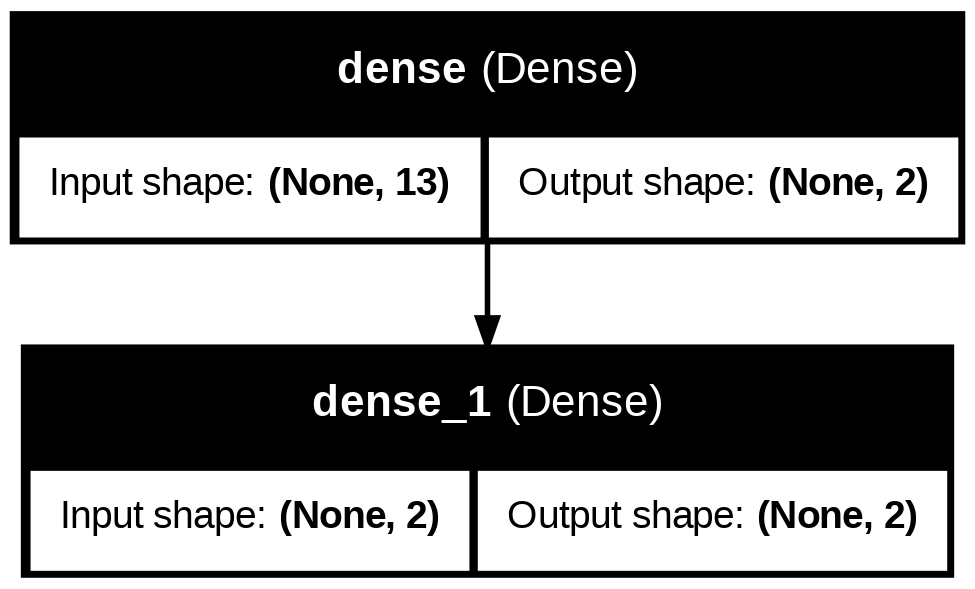

In [5]:
plot_model(model, to_file='model_architect.png', show_shapes=True, show_layer_names=True)



In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,216,738.527778,216.449074,38.229761,9.556174,0.968254,12.847813,216,1,16.583719,0.640950,0.397059,98.589,0
1213,328,748.896341,47.664634,63.138991,9.101974,0.989555,57.919494,328,1,20.435816,0.607407,0.205257,131.431,8
1214,97,761.690722,207.288660,22.751513,8.230351,0.932275,-24.674618,97,1,11.113246,0.591463,0.384921,67.427,0
1215,223,770.654708,235.502242,53.491654,8.643053,0.986860,73.244715,223,1,16.850294,0.557500,0.252834,112.656,0


#### Train and Test Dataset Split

In [10]:
# Split dataset into training and testing portion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
np.random.seed(100)

As the last layer requires 2 outputs, I need to apply one-hot encode to y_train and y_test. Hence, the model outputs two probabilities per sample, one for each class:[P(class 0), P(class 1)], where the two values sum to 1



In [11]:
# Categorize y
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

#### Model Training

In [41]:
# Compile the model with categorical cross-entropy
adam = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=50, batch_size=4, verbose=1,validation_data=(X_test, y_test_cat))

Epoch 1/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9143 - loss: 0.1978 - val_accuracy: 0.9180 - val_loss: 0.2005
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9114 - loss: 0.2010 - val_accuracy: 0.9098 - val_loss: 0.2573
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2057 - val_accuracy: 0.9262 - val_loss: 0.1895
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8940 - loss: 0.2293 - val_accuracy: 0.9139 - val_loss: 0.2145
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.1946 - val_accuracy: 0.8852 - val_loss: 0.2143
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.2265 - val_accuracy: 0.9221 - val_loss: 0.1943
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9113 - loss: 0.2229 - val_accuracy: 0.9139 - val_loss: 0.2004
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8928 - loss: 0.2087 - val_accuracy: 0.

### Result Analysis:
This section will focus on testing dataset. The same steps can be applied for training dataset if interested

#### Confusion Matrix of Testing Dataset

In [13]:
# Use model to evaluate train data
y_score_train = model.predict(X_train,verbose = 0) #array probablilities of 0 and 1
yhat_train = y_score_train.argmax(axis=-1)
print("Confusion matrix (Training Data): \n \n", confusion_matrix(y_train, yhat_train))


y_score_test = model.predict(X_test, verbose = 0)
yhat_test = y_score_test.argmax(axis=-1)
print("Confusion matrix (Test Data): \n \n", confusion_matrix(y_test, yhat_test))

Confusion matrix (Training Data): 
 
 [[768  40]
 [ 30 135]]
Confusion matrix (Test Data): 
 
 [[195  14]
 [  8  27]]


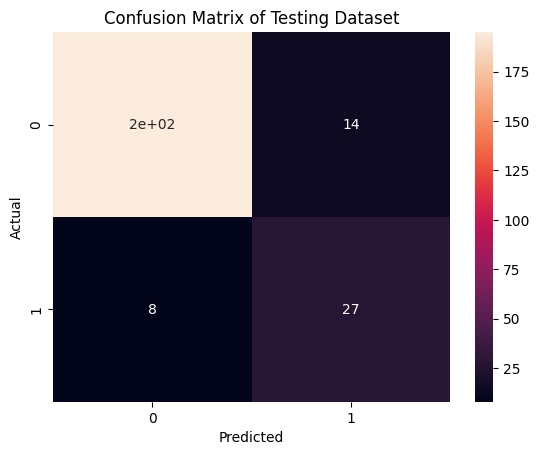

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       209
           1       0.66      0.77      0.71        35

    accuracy                           0.91       244
   macro avg       0.81      0.85      0.83       244
weighted avg       0.92      0.91      0.91       244



In [44]:
confusion_matrix = pd.crosstab(y_test[:,0], yhat_test,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix of Testing Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Stats = classification_report(y_test,yhat_test)
print(Stats)

#### Accuracy of Testing Dataset

In [45]:
print("Model accuracy score of training dataset is ", accuracy_score(y_train, yhat_train))
print("Model accuracy score of testing dataset is ", accuracy_score(y_test, yhat_test))

Model accuracy score of training dataset is  0.9280575539568345
Model accuracy score of testing dataset is  0.9098360655737705


#### Precision, Recall, F-score for EACH class in Testing Dataset

In [23]:
# Generate the classification report as a dictionary
stats_dict = classification_report(y_test, yhat_test, output_dict=True)

# Loop through each class and print the precision, recall, and F1-score
for class_label, metrics in stats_dict.items():
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Exclude summary metrics
        print(f"Class {class_label}:")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall:    {metrics['recall']:.2f}")
        print(f"  F1-score:  {metrics['f1-score']:.2f}")
        print()

Class 0:
  Precision: 0.96
  Recall:    0.93
  F1-score:  0.95

Class 1:
  Precision: 0.66
  Recall:    0.77
  F1-score:  0.71



#### ROC Curve of Testing Dataset

In [25]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_score_test[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_score_test[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

roc_auc_0:  0.9356117566643883
roc_auc_1:  0.9454545454545455 



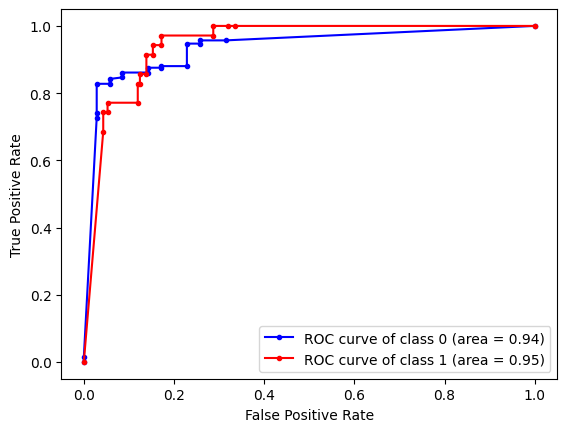

In [26]:
# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='ROC curve of class 0 (area = %0.2f)' % roc_auc_0, color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='ROC curve of class 1 (area = %0.2f)' % roc_auc_1, color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()